# Udacity Self Driving Car Nanodegegree
## Term 1. Project 4 - Advanced Lane Finding 

Lane finding is important component of self-driving cars, the lane finding algorithms should be robust to change in road types, lightining and weather conditions and curvature of the road. In this project we build algorithm to identify left and right lanes based on the images from dash-mounted camera video. The algorithm uses advanced computer vision techniques to detect lanes, locate the car between two lanes and estimate curvature of the road.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import math
# import libraries needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

from matplotlib import gridspec
% matplotlib inline
%load_ext line_profiler
import warnings
warnings.filterwarnings('ignore')

## Calibrate camera

In [2]:
# use glob to obtain list of calibration images names
cal_images_names = glob.glob('camera_cal/calibration*.jpg')

In [3]:
print(cal_images_names)

['camera_cal/calibration5.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration1.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration10.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration9.jpg', 'camera_cal/calibration8.jpg']


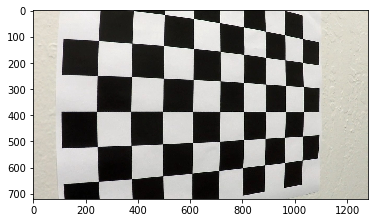

In [4]:
cal_image_name = cal_images_names[0]
cal_image = mpimg.imread(cal_image_name)
plt.imshow(cal_image)

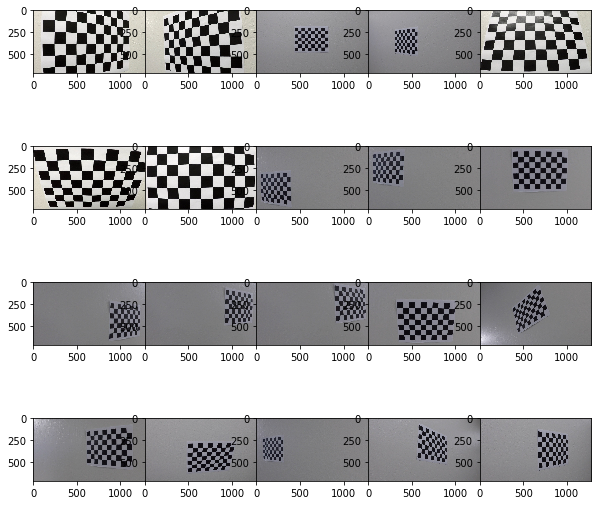

In [5]:
# Visualize calibration boards
grid_spec = gridspec.GridSpec(4,5)
fig = plt.figure(figsize = (10,10))

for i in range(4):
    for j in range(5):
        plt.subplot(grid_spec[i,j])
        cal_image_name = cal_images_names[i*5+j]
        cal_image = mpimg.imread(cal_image_name)
        plt.imshow(cal_image)
plt.subplots_adjust(wspace=0, hspace=0)

In [6]:
def calibrate_camera(cal_images_name, nx, ny):
    # arrays to store objects and image points from all the images
    objpoints = [] # 3D points in real world space
    imgpoints = [] #2D points in image space
    cal_image_with_corners = []
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0)....(8,5,0)
    objp = np.zeros ((9*6,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
    # go through images and find Chessboard corners
    for cal_img_name in cal_images_names:
        cal_img = mpimg.imread(cal_img_name)
        # convert to grayscale
        gray = cv2.cvtColor(cal_img, cv2.COLOR_BGR2GRAY) # use BGR2GRAY here as images were read by glob API
        # find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp) # same for all calibration images as it represents real chessboard
            # draw and display the corners
            cal_image_with_corners.append(cv2.drawChessboardCorners(cal_img, (9,6), corners, ret))
    # calibrate camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)        
    return mtx, dist, cal_image_with_corners       

In [7]:
nx, ny = 9, 6
mtx, dist, cal_image_with_corners = calibrate_camera(cal_images_names, nx, ny)

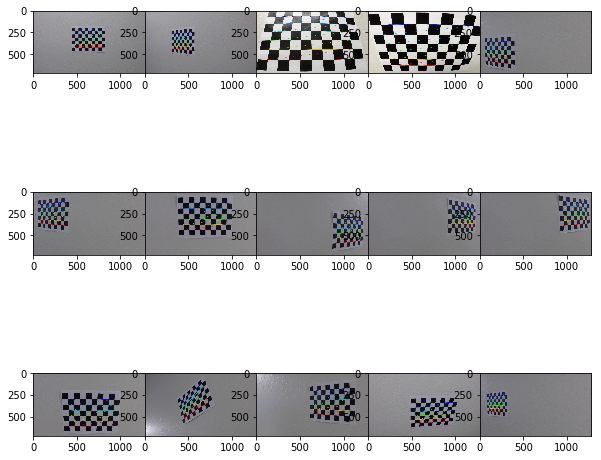

In [8]:
# Visualize 15 calibration chessboard images with found corners
grid_spec = gridspec.GridSpec(3,5)
fig = plt.figure(figsize = (10,10))

for i in range(3):
    for j in range(5):
        plt.subplot(grid_spec[i,j])
        plt.imshow(cal_image_with_corners[i*5 + j])
plt.subplots_adjust(wspace=0, hspace=0)

In [9]:
# #check that corners have been located correctly
# fig = plt.figure(figsize = (30,30))
# plt.imshow(cal_image_with_corners[12])

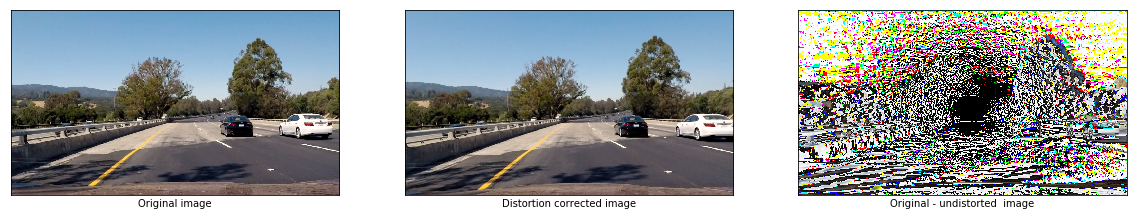

In [10]:
# let's take a distorted image and undistort it
image = mpimg.imread('test_images/test4.jpg')
undist = cv2.undistort(image, mtx, dist, None, mtx)
# plot original and undistorted images
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.xlabel('Original image')
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(1, 3, 2)
plt.imshow(undist)
plt.xlabel('Distortion corrected image')
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(1, 3, 3)
plt.imshow(image-undist)
plt.xlabel('Original - undistorted  image')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [11]:
# undistort function - returns undistorted image based on calibrated camera mtx, dist
def undistort_image(image, mtx = mtx, dist = dist):
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    return undist

In [12]:
image.shape

(720, 1280, 3)

## Apply perspective transform

(-0.5, 1279.5, 719.5, -0.5)

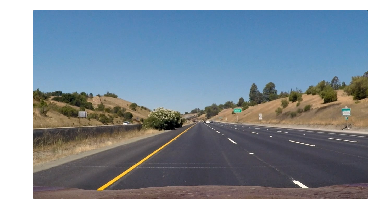

In [13]:
# We apply Perspective Transform to undistorted camera image get a bird view of the road
% matplotlib inline
image = mpimg.imread('test_images/straight_lines1.jpg')
undist = cv2.undistort(image, mtx, dist, None, mtx)
img = np.copy(image)
plt.imshow(img)
plt.axis('off')

In [14]:
p1_x1, p1_y1 = 200, 720
length, p1_angle1  = 240, 34
p1_x2 = p1_x1 + length * math.cos(p1_angle1 * math.pi / 180)
p1_y2 = p1_y1 - length * math.sin(p1_angle1 * math.pi / 180)

In [15]:
p2_x1, p2_y1 = 1100, 720
p2_angle2  = 34
p2_x2 = p2_x1 - length * math.cos(p2_angle2 * math.pi / 180)
p2_y2 = p2_y1 - length * math.sin(p2_angle2 * math.pi / 180)

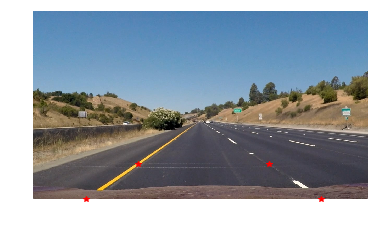

In [16]:
% matplotlib inline
plt.imshow(img)
plt.axis('off')
#plt.plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.plot(p1_x1,p1_y1, '*', color = 'r')
plt.plot(p1_x2,p1_y2, '*', color = 'r')
plt.plot(p2_x1,p2_y1, '*', color = 'r')
plt.plot(p2_x2,p2_y2, '*', color = 'r')
plt.show()

In [17]:
# compute the perspective transform
offset = 200
src = np.float32([[p2_x2,p2_y2],[p2_x1,p2_y1], [p1_x1,p1_y1],[p1_x2,p1_y2]])
dst = np.float32([[img.shape[1]-offset,img.shape[0]-length], [img.shape[1]-offset,img.shape[0]],\
       [offset, img.shape[0]], [offset,img.shape[0]-length]])
M = cv2.getPerspectiveTransform(src,dst) # compute the perspective tranform M
Minv = cv2.getPerspectiveTransform(dst, src) # compute the inverse perspective transfom Minv
warped = cv2.warpPerspective(img, M, (img.shape[1],img.shape[0]))

In [18]:
def warp_image(img, M = M, Minv = Minv):
    return cv2.warpPerspective(img, M, (img.shape[1],img.shape[0])), M, Minv

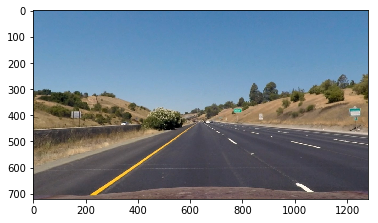

In [19]:
plt.imshow(undist)

In [20]:
def warp_image(img, M = M, Minv = Minv):
    return cv2.warpPerspective(img, M, (img.shape[1],img.shape[0])), M, M

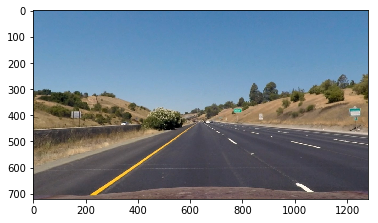

In [21]:
plt.imshow(undist)

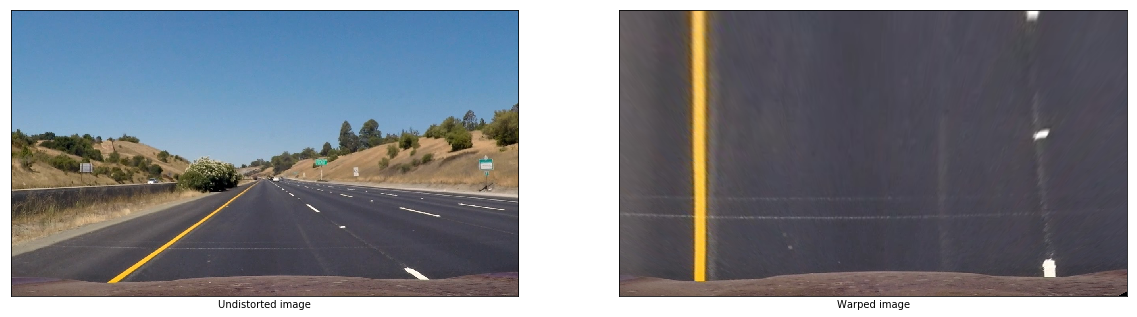

In [22]:
# plot undistorted and warped  images
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.xlabel('Undistorted image')
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(1, 2, 2)
plt.imshow(warped)
plt.xlabel('Warped image')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

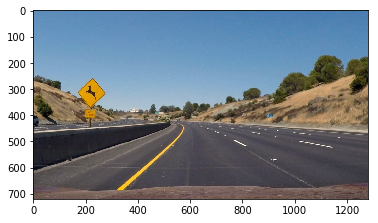

In [23]:
# back to curved lanes - let's take an image, indistort it and warp it
image = mpimg.imread('test_images/test2.jpg')
plt.imshow(image)
undist = cv2.undistort(image, mtx, dist, None, mtx)
warped = cv2.warpPerspective(undist, M, (image.shape[1],image.shape[0]))

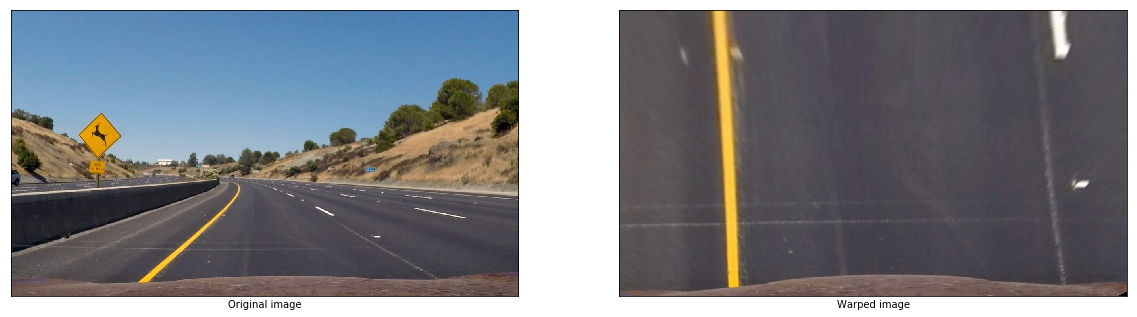

In [24]:
# plot original and warped  images
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.xlabel('Original image')
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(1, 2, 2)
plt.imshow(warped)
plt.xlabel('Warped image')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

# Detect lane lines

### Direct Gradient Thresholding

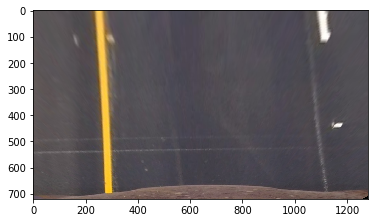

In [25]:
image = warped
plt.imshow(warped)

In [26]:
# Grariend threshold, the function identifies pixels where the gradient of the image
# falls within a specified threshold range
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh = (0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

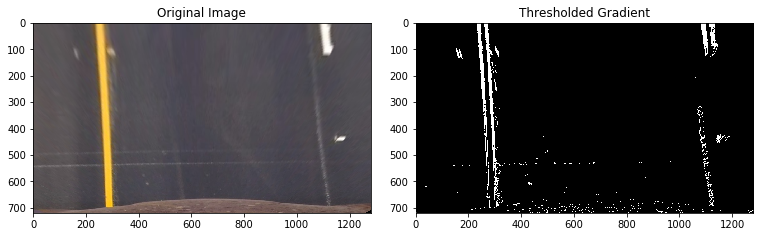

In [27]:
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh = (20, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [28]:
# Magnitude of the Gradient
# Grariend threshold, the function identifies pixels where the absolute value gradient of the image
# falls within a specified threshold range
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1)
    # 3) Calculate the magnitude 
    sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255 * sobel / np.max(sobel))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

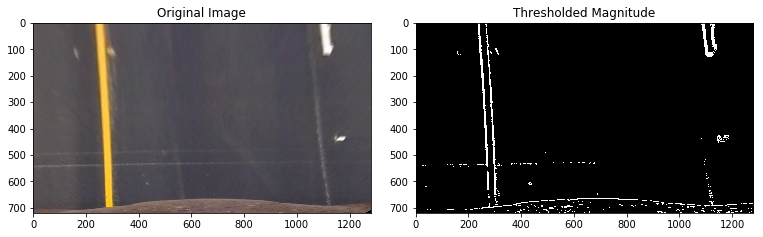

In [29]:
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [30]:
# Direction of the Gradient
# Grariend threshold, the function identifies pixels where the direction of the gradient of the image
# falls within a specified threshold range. As the lane lines are near vertical we are interested
# only in the edges of a particular orientation (~0 as direction of the gradient is arctan (sobel_y/sobel_x))
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
     # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    return binary_output

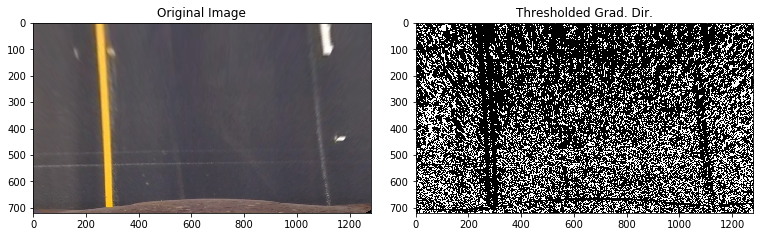

In [31]:
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [32]:
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh = (20, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

In [33]:
combined = np.zeros_like(dir_binary)
#combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
combined[(gradx == 1) | (mag_binary == 1)] = 1

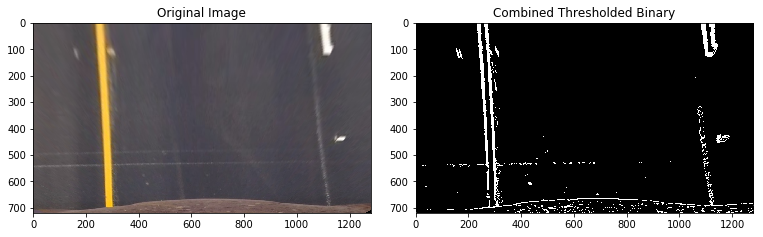

In [34]:
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combined Thresholded Binary')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# direct gradient thresholding produces good results for some methods like sobel_x threshold and magnitude 
# threshold, but not for others. This is due to loss of valuable information, in particular 
# as Sobel gradients require conversion to grayscale we loose yellow lane upon conversion into gray.
# Let's try other methods...

### Color Thresholding

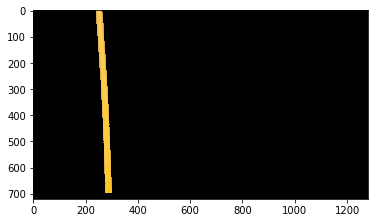

In [39]:
# let's convert warped image to HSV colour space and apply colour masks
def apply_colour_mask(hsv,img,low,high):
    # Apply colour mask to image
    mask = cv2.inRange(hsv, low, high)
    result = cv2.bitwise_and(img,img, mask= mask)
    return result

image_HSV = cv2.cvtColor(warped,cv2.COLOR_RGB2HSV) # convert to HSV colour space 
yellow_hsv_low  = np.array([ 0, 80, 200])
yellow_hsv_high = np.array([ 40, 255, 255])
yellow = apply_colour_mask(image_HSV,warped,yellow_hsv_low,yellow_hsv_high)
# display yellow colour mask
plt.imshow(yellow )

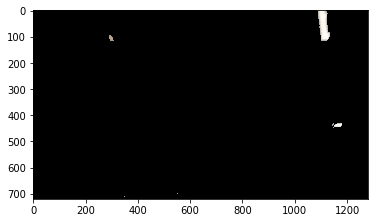

In [41]:
white_hsv_low  = np.array([ 0,   0,   160])
white_hsv_high = np.array([ 255,  80, 255])
white = apply_colour_mask(image_HSV,warped,white_hsv_low,white_hsv_high)
# display white colour mask
plt.imshow(white)

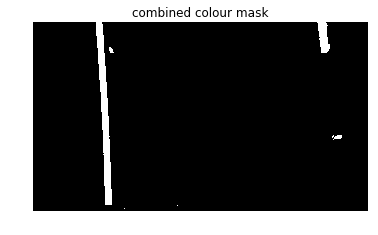

In [42]:
def colour_mask(hsv,low,high):
    # Return mask from HSV 
    mask = cv2.inRange(hsv, low, high)
    return mask

mask_yellow = colour_mask(image_HSV,yellow_hsv_low,yellow_hsv_high)
mask_white = colour_mask(image_HSV,white_hsv_low,white_hsv_high)
combined_colour_mask = cv2.bitwise_or(mask_yellow,mask_white)
plt.imshow(combined_colour_mask,cmap='gray')
plt.title('combined colour mask')
plt.axis('off');

### Channel Thresholding

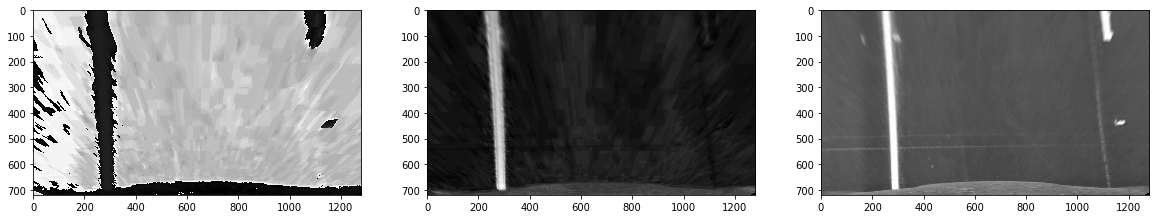

In [43]:
# HSV colour space
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(image_HSV[:,:,0],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(image_HSV[:,:,1],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(image_HSV[:,:,2],cmap='gray')

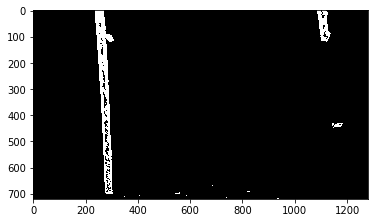

In [44]:
# the V channel in the HSV colour space picks up lanes well, if we apply thresholds we obtain the following result
V = image_HSV[:,:,2]
thresh_V = (150,255)
binary_V = np.zeros_like(V)
binary_V[(V > thresh_V[0]) & (V < thresh_V[1])] = 1
plt.imshow(binary_V, cmap = 'gray')

In [45]:
# HLS colour space
image_HLS = cv2.cvtColor(warped,cv2.COLOR_RGB2HLS) # convert to HSL colour space 
#image = gaussian_blur(warped, kernel=5)

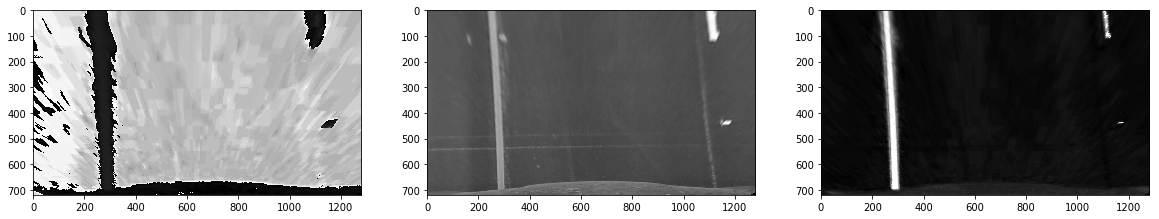

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(image_HLS[:,:,0],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(image_HLS[:,:,1],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(image_HLS[:,:,2],cmap='gray')

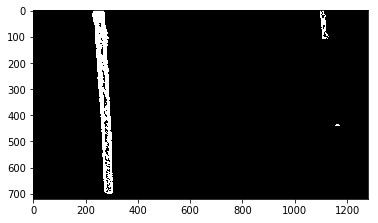

In [47]:
# the S channel in the HSL colour space picks up lanes well, if we apply thresholds we obtain the following result
S = image_HLS[:,:,2]
thresh_S = (90,255)
binary_S = np.zeros_like(S)
binary_S[(S > thresh_S[0]) & (S < thresh_S[1])] = 1
plt.imshow(binary_S, cmap = 'gray')

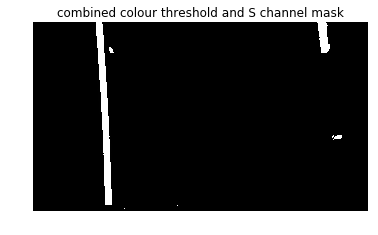

In [48]:
combined_mask = cv2.bitwise_or(combined_colour_mask,binary_S)
plt.imshow(combined_mask,cmap='gray')
plt.title('combined colour threshold and S channel mask')
plt.axis('off');

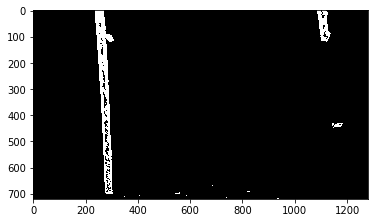

In [49]:
thresh_V = (150,255)
binary_V = np.zeros_like(V)
binary_V[(V > thresh_V[0]) & (V < thresh_V[1])] = 1
plt.imshow(binary_V, cmap = 'gray')

### Colour and channel thresholding functions:

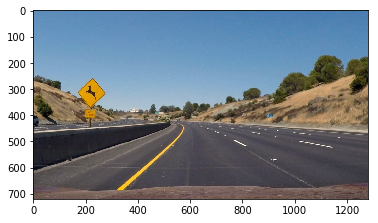

In [50]:
image = mpimg.imread('test_images/test2.jpg')
plt.imshow(image)

In [51]:
# apply undistortion, warping, processing in HSV colour space. returns combined_colour_mask
def apply_colour_mask(img, mtx = mtx, dist = dist, M = M):
    image = np.copy(img)
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    warped = cv2.warpPerspective(img, M, (image.shape[1],image.shape[0]))
    image_HSV = cv2.cvtColor(warped,cv2.COLOR_RGB2HSV) # convert to HSV colour space 
    # yellow colour mask
    yellow_hsv_low  = np.array([ 0, 80, 200])
    yellow_hsv_high = np.array([ 40, 255, 255])
    mask_yellow = color_mask(image_HSV,yellow_hsv_low,yellow_hsv_high)
    # white colour mask
    white_hsv_low  = np.array([ 0,   0,   160])
    white_hsv_high = np.array([ 255,  80, 255])
    mask_white = color_mask(image_HSV,white_hsv_low,white_hsv_high)
    # combined colour mask
    combined_colour_mask = cv2.bitwise_or(mask_yellow,mask_white)
    return combined_colour_mask

In [52]:
combined_colour_mask = apply_colour_mask(image, mtx = mtx, dist = dist, M = M)

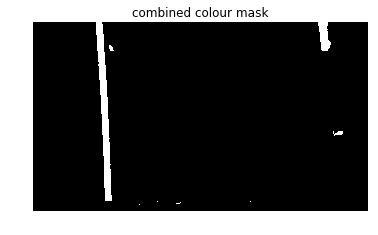

In [53]:
plt.imshow(combined_colour_mask,cmap='gray')
plt.title('combined colour mask')
plt.axis('off');

In [54]:
# use glob to obtain list of test images names
test_images_names = glob.glob('test_images/test*.jpg')
test_images_names

['test_images/test6.jpg',
 'test_images/test5.jpg',
 'test_images/test4.jpg',
 'test_images/test1.jpg',
 'test_images/test3.jpg',
 'test_images/test2.jpg']

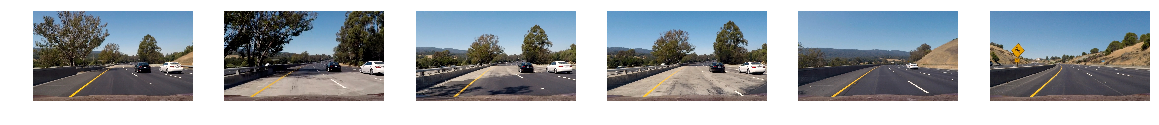

In [55]:
# lets check how colour thresholding is able to detect lanes on test images
test_images = []
plt.figure(figsize=(20,20))
for ind,test_img_name in enumerate(test_images_names):
    test_img = mpimg.imread(test_img_name)
    test_images.append(test_img)
    plt.subplot(1, 6, ind+1)
    plt.imshow(test_img)
    plt.axis('off');
plt.show()    

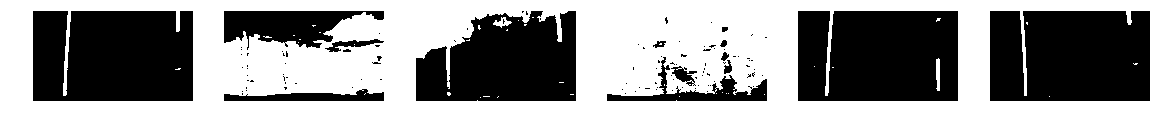

In [56]:
plt.figure(figsize=(20,20))
for ind,img in enumerate(test_images):
    image = np.copy(img)
    combined_colour_mask = apply_colour_mask(image, mtx = mtx, dist = dist, M = M)
    plt.subplot(1, 6, ind+1)
    plt.imshow(combined_colour_mask, cmap='gray')
    plt.axis('off');
plt.show()  

In [57]:
# we can see that colour thresholding detects lanes well when the lane is dark, not so well when the lane is of lighter
# colour

In [63]:
def apply_channel_mask(img, mtx = mtx, dist = dist, M = M):
    image = np.copy(img)
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    warped = cv2.warpPerspective(image, M, (image.shape[1],image.shape[0]))
    # the S channel in the HSL colour space picks up lanes well, if we apply thresholds we obtain the following result
    image_HLS = cv2.cvtColor(warped,cv2.COLOR_RGB2HLS) # convert to HSL colour space 
    S = image_HLS[:,:,2]
    thresh_S = (90,255)
    binary_S = np.zeros_like(S)
    binary_S[(S > thresh_S[0]) & (S < thresh_S[1])] = 1
    return binary_S, undist, image

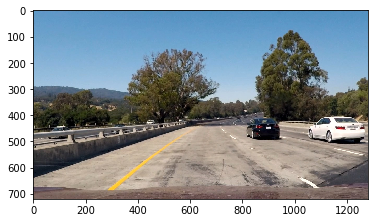

In [64]:
image = mpimg.imread('test_images/test1.jpg')
plt.imshow(image)

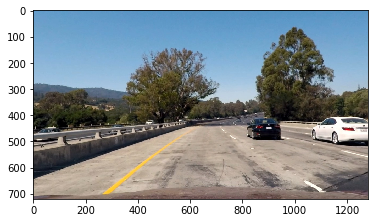

In [65]:
undist = cv2.undistort(image, mtx, dist, None, mtx)
plt.imshow(undist)

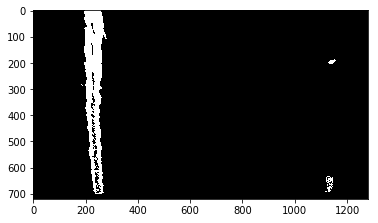

In [71]:
binary_S, _, _ = apply_channel_mask(undist, mtx = mtx, dist = dist, M = M)
plt.imshow(binary_S, cmap = 'gray')

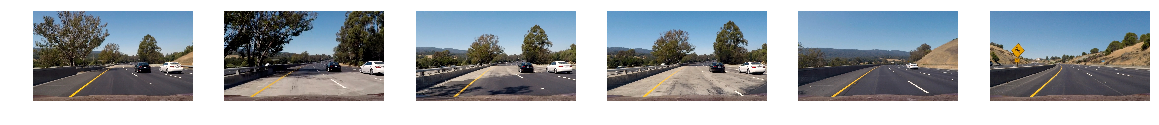

In [72]:
# lets check how S channel thresholding (in HSL colour space) is able to detect lanes on test images
test_images = []
plt.figure(figsize=(20,20))
for ind,test_img_name in enumerate(test_images_names):
    test_img = mpimg.imread(test_img_name)
    test_images.append(test_img)
    plt.subplot(1, 6, ind+1)
    plt.imshow(test_img)
    plt.axis('off');
plt.show()  

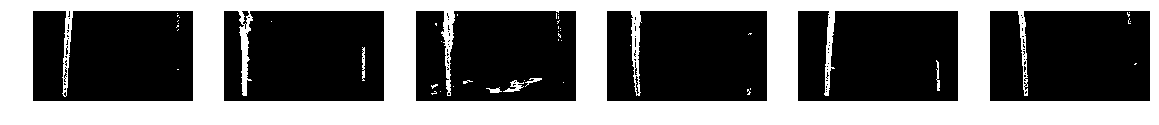

In [75]:
plt.figure(figsize=(20,20))
for ind,img in enumerate(test_images):
    image = np.copy(img)
    channel_mask, _, _ = apply_channel_mask(image, mtx = mtx, dist = dist, M = M)
    plt.subplot(1, 6, ind+1)
    plt.imshow(channel_mask, cmap='gray')
    plt.axis('off');
plt.show() 

### Finding the Lines

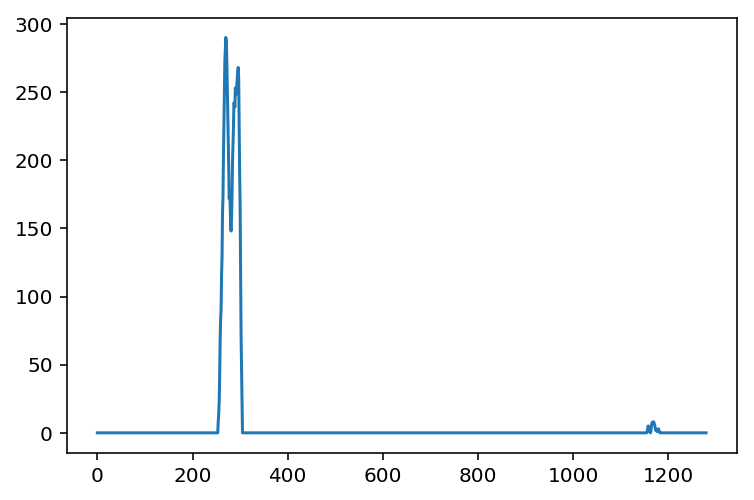

In [444]:
binary_S, _, _ = apply_channel_mask(image, mtx = mtx, dist = dist, M = M)
img = binary_S
histogram = np.sum(img[int(img.shape[0]/2):,:], axis=0)
plt.plot(histogram)
binary_warped = np.copy(binary_S)

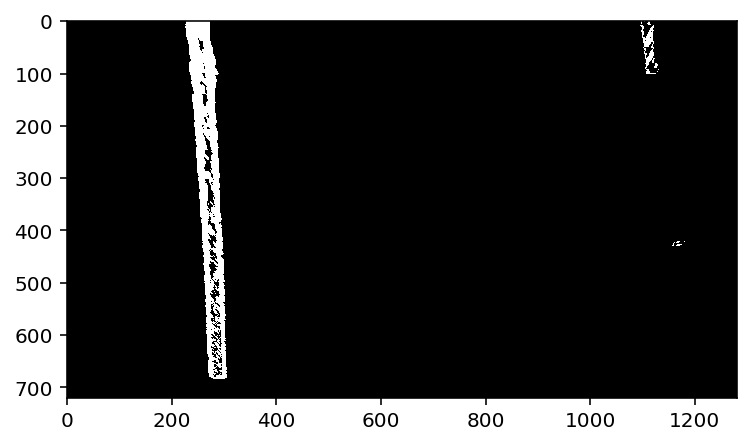

In [445]:
plt.imshow(binary_warped, cmap = 'gray')

### Locate the Lane Lines and Fit the Polynomial

In [423]:
def get_initial_lane_fit(img, draw_ind = False, nwindows = 20):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[int(img.shape[0]/2):,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((img, img, img))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        if draw_ind == True:    
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
                (0,255,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
                (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    if ((len(leftx) == 0) | (len(lefty) == 0) | (len(rightx) == 0) | (len(righty) == 0)):
        lines_found = False
        left_fit = float('nan')
        right_fit = float('nan')      
    else:        
        lines_found = True
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        
    if draw_ind == True:
        # Code from Udacity lesson
        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
        plt.imshow(out_img)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)
        
    return lines_found, left_fit, right_fit

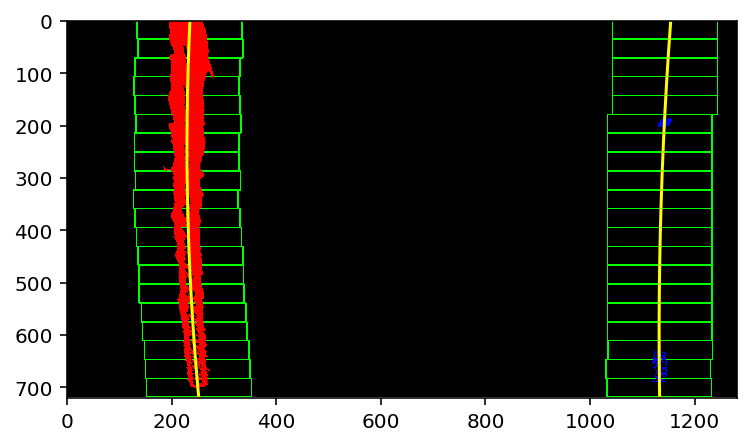

In [424]:
lines_found, left_fit, right_fit = get_initial_lane_fit(binary_warped, draw_ind = True, nwindows = 20)

In [117]:
def get_lane_fit(img, left_fit, right_fit, draw_ind = False):
    # Code from Udacity lesson
    # Assume you now have a new img binary image 
    # from the next frame of video (also called "img")
    # It's now much easier to find line pixels!
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # Fit a second order polynomial to each
    if ((len(leftx) == 0) | (len(lefty) == 0) | (len(rightx) == 0) | (len(righty) == 0)):
        lines_found = False
        left_fit = float('nan')
        right_fit = float('nan')       
    else:
        lines_found = True
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
    
    if draw_ind == True:
        # Generate x and y values for plotting
        ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
        # Code from Udacity lesson
        # Create an image to draw on and an image to show the selection window
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        window_img = np.zeros_like(out_img)
        # Color in left and right line pixels
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
        plt.imshow(result)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)
        
    return lines_found, left_fit, right_fit

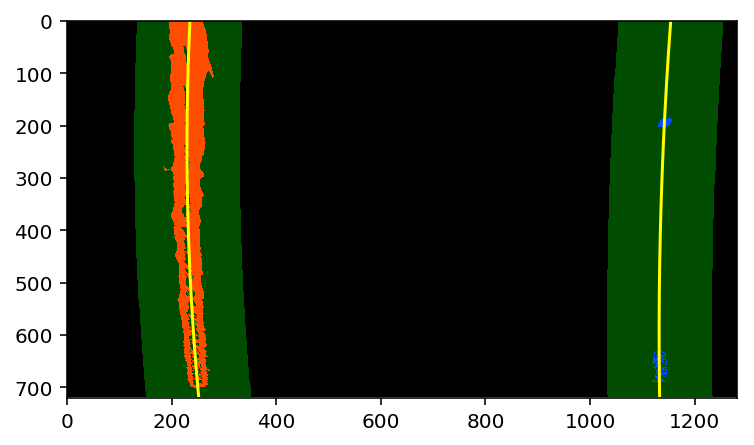

In [118]:
lines_founds, left_fit, right_fit = get_lane_fit(binary_warped, left_fit, right_fit, draw_ind = True)
# # Generate x and y values for plotting
# ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
# left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
# right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

### Measuring curvature

In [119]:
# Code from Udacity lesson
# Measure the curvature in pixel
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48

5185.285699659231 8013.791113245734


In [120]:
leftx = left_fitx
rightx = right_fitx

In [121]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

1681.3435893237677 m 2631.240746084745 m


In [122]:
def get_curvature(ploty, leftx, rightx):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    return left_curverad, right_curverad

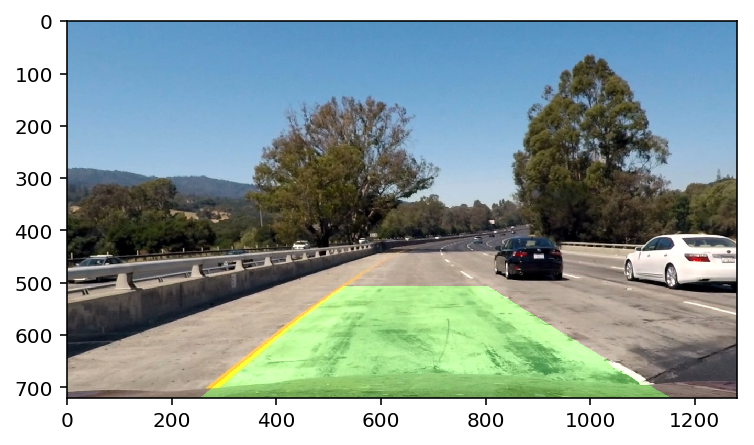

In [123]:
# Code from Udacity lesson
# Create an image to draw the lines on
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
plt.imshow(result)

### Image Processing Pipeline

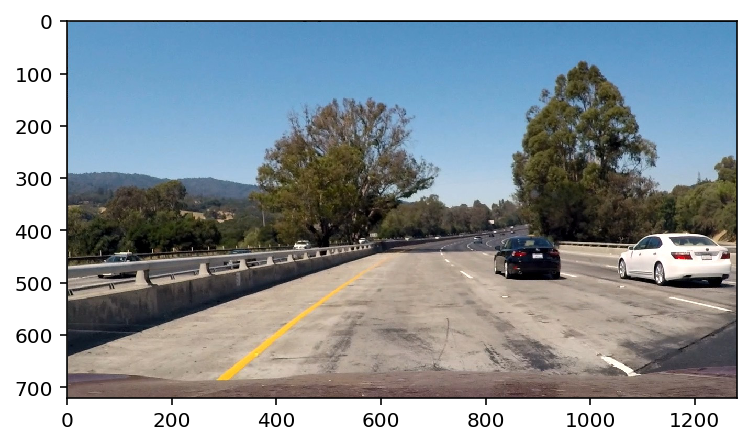

In [516]:
image = mpimg.imread('test_images/test1.jpg')
plt.imshow(image)

In [517]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = np.array([None, None, None])
        #polynomial coefficients for the most recent fit
        self.current_fit = np.array([None, None, None])#[np.array([False])] 
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [518]:
# fit lines based on the coefficients of polynomials
def fit_lines(ploty, left_fit, right_fit):
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return left_fitx, right_fitx

In [519]:
def sanity_check(ploty, left_fit, right_fit): #,left_line_radius_of_curvature, right_line_radius_of_curvature):
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    left_curvature, right_curvature = get_curvature(ploty, left_fitx, right_fitx)
    sanity = True
    if ((left_curvature < 100) | (left_curvature > 10000) | (right_curvature < 100) | (right_curvature > 10000)):
        sanity = False
#     if ((left_line_radius_of_curvature != None) & (right_line_radius_of_curvature != None)):
#         if (abs(1/left_curvature - 1/left_line_radius_of_curvature) / (1/left_line_radius_of_curvature) > 0.5):
#             sanity = False
#         if (abs(1/right_curvature - 1/right_line_radius_of_curvature) / (1/right_line_radius_of_curvature) > 0.5):
#             sanity = False
#         if (abs(1/right_curvature - 1/left_curvature) / (0.5 * (1/right_curvature + left_curvature )) > 0.5):
#             sanity = False    
            
    return sanity 

In [572]:
left_line = Line()
right_line = Line()
def process_image(image, Minv = Minv):
    #image = np.copy(image)
    image_size = image.shape
    global left_line, right_line
    # obtain binary mask, undistorted image and original image
    binary_S, _, _ = apply_channel_mask(image)
    ploty = np.linspace(0, binary_S.shape[0]-1, binary_S.shape[0] )    
 
    # if the lines were not detected in the last iteration or first image, get initial lane fit
    if (left_line.detected == False) | (right_line.detected == False):
        lines_found, left_fit, right_fit = get_initial_lane_fit(binary_S) # get initial line fit
        # flip line detected flags for left and right lines
        if (lines_found == True) & (sanity_check(ploty, left_fit, right_fit)): #,left_line.radius_of_curvature: #,\
            #right_line.radius_of_curvature) == True)):# & (np.linalg.norm(left_fit - left_line.current_fit) < 0.025)):
            left_line.detected = True
            right_line.detected = True
            left_line.current_fit, right_line.current_fit = left_fit, right_fit
            left_line.best_fit, right_line.best_fit = left_line.current_fit, right_line.current_fit
        else:
            left_fit, right_fit = left_line.current_fit, right_line.current_fit 
    else:
        lines_found, left_fit, right_fit = get_lane_fit(binary_S, left_line.current_fit, right_line.current_fit)
        if (lines_found == True) & (sanity_check(ploty, left_fit, right_fit)): # left_line.radius_of_curvature: #,\
            #right_line.radius_of_curvature) == True)):# & (np.linalg.norm(left_fit - left_line.current_fit) < 0.025)):
            left_line.detected = True
            right_line.detected = True
            left_line.current_fit, right_line.current_fit = left_fit, right_fit
        else:
            left_fit, right_fit = left_line.current_fit, right_line.current_fit   
              
    if ((left_line.current_fit.all() != None) & (right_line.current_fit.all() != None)):
        if ((left_line.best_fit.all() != None) & (right_line.best_fit.all() != None)):
            if ((abs(left_line.best_fit[0] - left_fit[0])< 0.005) & (abs(right_line.best_fit[0] - right_fit[0]) < 0.005)):
                if ((abs(left_line.best_fit[1] - left_fit[1])< 0.005) & (abs(right_line.best_fit[1] - right_fit[1]) < 0.005)):
                    if ((abs(left_line.best_fit[2] - left_fit[2])< 0.005) & (abs(right_line.best_fit[2] - right_fit[2]) < 0.005)):
                        left_line.best_fit = 0.95 * left_line.best_fit + 0.05 * left_fit
                        right_line.best_fit = 0.95 * right_line.best_fit + 0.05 * right_fit
        else:
            left_line.detected, right_line.detected = False, False
         #   left_line.best_fit, right_line.best_fit = left_line.current_fit, right_line.current_fit
    
    #left_fit, right_fit = left_line.best_fit, right_line.best_fit
 
    #print(left_fit, right_fit)
    # get curvature
    left_fitx, right_fitx = fit_lines(ploty, left_line.best_fit, right_line.best_fit)
    #left_line.recent_xfitted, right_line.recent_xfitted = left_fitx, right_fitx
    left_curvature, right_curvature = get_curvature(ploty, left_fitx, right_fitx)
    left_line.radius_of_curvature, right_line.radius_of_curvature = left_curvature, right_curvature
    str_curv = 'Curvature: Right = ' + str(np.round(right_curvature,2)) + ', Left = ' + str(np.round(left_curvature,2))
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_S).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))    
    
    # compute center_location
    center_location = 0.5 * (left_fit[0]*image_size[0]**2 + left_fit[1]*image_size[0] + left_fit[2] +\
                       right_fit[0]*image_size[0]**2 + right_fit[1]*image_size[0] + right_fit[2])    
    ## Compute lane offset
    center_offset = center_location - image_size[1]/2
    center_offset = np.round(center_offset/2.8136,2)
    str_offset = 'Lane deviation: ' + str(center_offset) + ' cm.'
    # Draw the lane onto the warped blank image
    font = cv2.FONT_HERSHEY_COMPLEX
    if center_offset > 30:
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    else:
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image_size[1], image_size[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
 
    cv2.putText(result, str_curv, (30, 60), font, 1, (0,255,0), 2)
    cv2.putText(result, str_offset, (30, 90), font, 1, (0,255,0), 2)
    
    return result    

In [573]:
result = process_image(image, Minv = Minv)

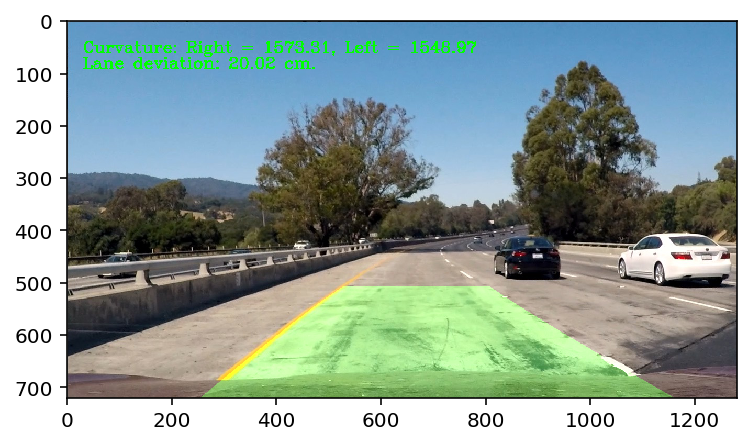

In [574]:
plt.imshow(result)

In [575]:
project_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4");
white_clip = clip1.fl_image(process_image); 
%time white_clip.write_videofile(project_output, audio=False);

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [01:36<00:00, 13.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 2min 45s, sys: 8.94 s, total: 2min 54s
Wall time: 1min 36s


In [569]:
pwd

'/Users/vm/Documents/Udacity/SDCND/Term1/CarND-Advanced-Lane-Lines-P4/CarND-Advanced-Lane-Lines'

In [486]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('project_video_output.mp4'))